# Classification Trees & Random Forest Classifier

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\Users\FMeic\OneDrive - ZHAW\HS23\Data Science Fundamentals\ZHAW-Data-Science-Fundamentals\Week9


## Import the apartment data

In [2]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'tax_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(804, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,tax_income,dist_supermarket
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",3.5,122,1,3180,26.07,47.255714,8.804976,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,317.117916
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",4.0,87,0,1690,19.43,47.254879,8.793746,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,612.612674
2,1662023745-834,"8608 Bubikon, ZH",3.5,92,0,2350,25.54,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
3,1662023701-503,"8608 Bubikon, ZH",3.5,130,0,2500,19.23,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",2.5,78,0,3760,48.21,47.361378,8.533339,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.73770,349.937421


## Create new variable 'price_per_m2_class'

In [3]:
# Create labels
labels = ['0 - 19', '20 - 24', '25 - 32', '>= 33']

# Create new categorical variable
df["price_per_m2_class"] = pd.cut(df['price_per_m2'], bins=[0, 20, 25, 33, 150], labels=labels)

# Check values
df[['price_per_m2', 'price_per_m2_class']].head(10)

,price_per_m2,price_per_m2_class
0,26.07,25 - 32
1,19.43,0 - 19
2,25.54,25 - 32
3,19.23,0 - 19
4,48.21,>= 33
6,49.49,>= 33
7,40.04,>= 33
8,30.69,25 - 32
9,30.77,25 - 32
10,82.67,>= 33


## Classification Tree
See also: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [4]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['area', 
                                                        'rooms',
                                                        'pop_dens',
                                                        'tax_income',
                                                        'dist_supermarket']], 
                                                        df['price_per_m2_class'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     area  rooms     pop_dens   tax_income  dist_supermarket
362    75    3.5  1662.597326  70118.99692        595.010106
369    90    3.5  1662.597326  70118.99692        157.537439
496   100    3.5  1327.635328  80595.52826        147.967057
349    94    3.5  1662.597326  70118.99692         52.959836
308    94    3.5  1662.597326  70118.99692         65.909235 

y_train:
362    20 - 24
369     0 - 19
496     0 - 19
349    25 - 32
308    25 - 32
Name: price_per_m2_class, dtype: category
Categories (4, object): ['0 - 19' < '20 - 24' < '25 - 32' < '>= 33']


### Fit the classification tree model

In [5]:
# Create decision tree regressor object
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=3)

# Train decision tree regressor
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

### Calculate accuracy

In [6]:
# Calculate accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')

Accuracy: 0.5155


### Cross validation

In [7]:
# Cross-validation (5-fold)
cv = cross_val_score(clf, 
                     X_test, 
                     y_test, 
                     cv=5, 
                     scoring='accuracy')

# Result
print(list(cv.round(4)), end=" ")

[0.5455, 0.5312, 0.625, 0.5625, 0.5938] 

### Print text representation of the classification tree

In [8]:
# Text representation of the classification tree
text_representation = tree.export_text(clf, 
                                       feature_names=list(X_train.columns),
                                       max_depth=2)

# Print text_representation
print(text_representation)

|--- pop_dens <= 3215.98
|   |--- area <= 59.50
|   |   |--- area <= 44.50
|   |   |   |--- class: >= 33
|   |   |--- area >  44.50
|   |   |   |--- class: 25 - 32
|   |--- area >  59.50
|   |   |--- area <= 97.50
|   |   |   |--- class: 20 - 24
|   |   |--- area >  97.50
|   |   |   |--- class: 20 - 24
|--- pop_dens >  3215.98
|   |--- area <= 42.50
|   |   |--- class: >= 33
|   |--- area >  42.50
|   |   |--- area <= 98.50
|   |   |   |--- class: >= 33
|   |   |--- area >  98.50
|   |   |   |--- class: 25 - 32



### Vizualizing the classification tree

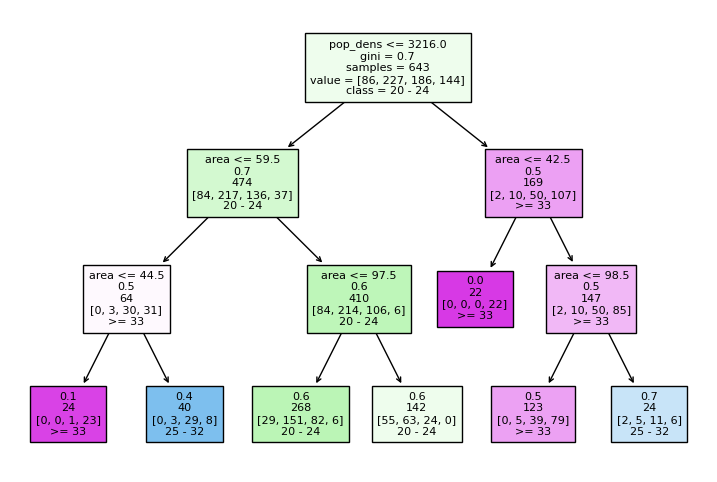

In [9]:
# For the meaning of numbers in each box, look at the root node
fig = plt.figure(figsize=(9,6))

# Plot the 
tree_plot = tree.plot_tree(clf, 
                           feature_names=list(X_train.columns),  
                           class_names=['0 - 19', '20 - 24', '25 - 32', '>= 33'],
                           filled=True,
                           fontsize=8,
                           label='root',
                           precision=1)

## Random Forest Classifier
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Fit the Random Forest Classifier

In [10]:
X, y = make_classification(n_features=4, n_informative=2,
                           random_state=5, shuffle=False)

clf_rf = RandomForestClassifier(n_estimators=500, 
                               max_depth=10, 
                               random_state=42)
clf_rf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf_rf.predict(X_test)

# Calculate accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')

Accuracy: 0.5776


### Show feature importance

Index(['area', 'pop_dens', 'dist_supermarket', 'tax_income', 'rooms'], dtype='object')
[0.28686945 0.2277348  0.20321975 0.1414003  0.1407757 ]


<Axes: ylabel='features'>

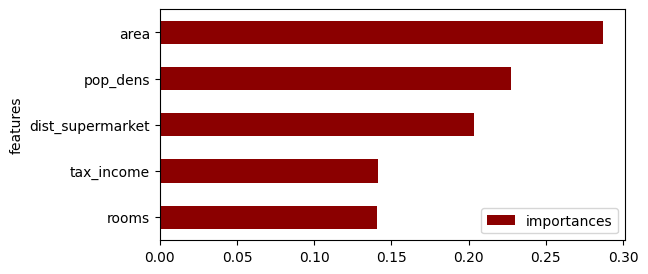

In [11]:
cols = X_train.columns

# Derive feature importance from random forest
importances = clf_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))